# Binary Classification with SciKitLearn
--------------------------
### Contents:
- **Background**
- **Data importing/preprocessing - [10 points]**
- **Feature selection and dimensionality reduction - [15 points]**
- **SVM classifier - [20 points]**
- **Logistic regression - [30 points]**
- **Random forest - [25 points]**
- **1 minute feedback - [Optional]**

--------------------------

### Section 1: Background 
In this assignment, your task is to build a binary classifier that can distinguish between two brain disorders - Alzheimer's (AD) and Progressive Supranuclear Palsy (PSP). We will be using gene expression data sourced by RNA sequencing (RNA-seq) the brain tissue of  participants. The study can be found at [<sup>1</sup>](#fn1).

Using RNA sequencing we can quantitatively measure which genes are activated and their expression levels. By comparing the gene expression levels of normal and mutated cells, we can identify differences that might reveal which genes are causing these mutations. These gene expression patterns can also serve as indicators to detect and differentiate similar diseases such as AD and PSP.


<span id="fn1"> <sup>1</sup> https://www.nature.com/articles/sdata201689</span>

--------------------------




### Section 2: Data importing/preprocessing -  [10 points]

- Load the gene expression dataset and the labels into pandas dataframe. 
- Retain only 'Diagnosis' and 'ID' columns in the labels dataframe.
- Combine gene_exp and labels dataframes based on 'ID'. 
- Remove samples containing labels other than Alzheimer's ('AD') or Progressive supranuclear palsy ('PSP').
- Encode textual labels to numbers. For example 'AD' to 0 and 'PSP' to 1.

--------------------------


In [1]:
import pandas as pd
import numpy as np

# do not modify this
np.random.seed(89802024)


In [2]:
# Read the gene expression dataset (normalized_gene_expression.txt) into a dataframe

gene_exp = pd.read_csv('normalized_gene_expression.txt', delimiter = "\t")
gene_exp.head()

,ID,ENSG00000223972,ENSG00000227232,ENSG00000243485,ENSG00000268020,ENSG00000240361,ENSG00000186092,ENSG00000238009,ENSG00000239945,ENSG00000233750,...,ENSG00000198886,ENSG00000210176,ENSG00000210184,ENSG00000210191,ENSG00000198786,ENSG00000198695,ENSG00000210194,ENSG00000198727,ENSG00000210195,ENSG00000210196
0,11344_TCX,-2.168275,2.867350,-2.235659,-2.878004,-2.878004,-2.921482,0.972981,2.589508,2.049147,...,15.177233,8.620554,8.415900,9.195871,13.407342,13.089514,10.035159,14.350876,8.401389,9.124693
1,11316_TCX,-2.667791,2.919402,-3.118351,-2.963895,-2.963895,-2.963895,1.602722,3.196802,2.830484,...,15.177233,11.611706,11.478740,12.284014,13.527804,13.350245,12.613126,14.240878,10.760811,12.021301
2,11431_TCX,-3.391138,3.153625,-2.106056,-4.424961,-4.418319,-4.540941,1.453881,2.986039,2.836847,...,15.177233,10.502635,10.133659,11.504803,13.407342,13.138792,11.990068,14.472362,9.848741,10.852588
3,11341_TCX,-2.801722,3.269001,-1.133302,-3.118351,-3.118351,-3.175145,2.442415,3.961310,2.803290,...,14.764855,9.920577,10.133659,11.255892,13.466460,13.350245,12.182661,14.240878,9.637298,9.904126
4,11289_TCX,-0.162419,5.284041,0.250976,-2.218957,-2.218957,-2.328570,2.065006,3.218117,2.857921,...,14.764855,11.780232,11.209200,12.021301,13.350245,13.189390,12.353690,14.350876,11.722941,11.959163


In [4]:
# Read the labels for the dataset from labels.csv file

labels = pd.read_csv("./labels.csv")
labels.head()

,ID,Diagnosis,RIN,3primeBias,Sex,AgeAtDeath
0,1005_TCX,AD,8.6,1.333306,0,90_or_above
1,1010_TCX,AD,8.3,1.593823,1,63
2,1015_TCX,AD,8.7,1.671713,1,77
3,1019_TCX,AD,7.8,1.402270,0,86
4,1029_TCX,AD,9.7,1.599649,0,69


In [5]:
# Drop unnecessary columns in labels dataframe

labels = labels[['ID','Diagnosis']]
labels.head()

,ID,Diagnosis
0,1005_TCX,AD
1,1010_TCX,AD
2,1015_TCX,AD
3,1019_TCX,AD
4,1029_TCX,AD


In [6]:
# Merge both dataframes based on column 'ID' 
df = labels.join(gene_exp.set_index('ID'), on='ID')
df['Diagnosis'].value_counts()

Diagnosis
PSP                 82
AD                  80
Control             76
Pathologic Aging    30
Name: count, dtype: int64

In [7]:
# Retain only samples having labels of 'AD' or 'PSP'

df = df[(df['Diagnosis'] == 'AD') | (df['Diagnosis'] == 'PSP')]
df['Diagnosis'].value_counts()

Diagnosis
PSP    82
AD     80
Name: count, dtype: int64

In [8]:
# Separate the merged dataframe into features and labels. Remove 'ID' column

X =  df.drop(columns=['Diagnosis','ID'])
y = np.array(df['Diagnosis'])


In [9]:
# Encode textual labels in 'y' to numbers

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(np.unique(y))
y = le.transform(y)
assert(np.all((y == 0) | (y == 1)))

--------------------------
### Section 3 - Feature selection and dimensionality reduction -  [15 points]

On analyzing the shape of the gene expression dataframe we can see that the number of features (p) is much larger than the number of observations (N). This is known as the p >> N problem, and is commonly seen in genomics and healthcare datasets.
To mitigate this problem, we will employ feature selection and dimensionality reduction techniques so that we have a more compact feature space. 


- Randomly select 100 features.
- Select top 1%  most variant features.
- Perform PCA and select principal components that account for 95% of the total explained variance.
    - Plot the first two principal components of X_projected, coloring data points by their labels. Explain if the data is linearly separable in this plot.

  
--------------------------


In [10]:
# Randomly select 100 features

X_rand = X.sample(n=100, axis='columns') 

assert X_rand.shape == (162, 100)

In [11]:
top_1 = int(np.ceil(X.shape[1]/100))

new_df = pd.DataFrame(X.var(), columns=["features"])
new_df = new_df.sort_values(by=["features"], ascending=False)
c = new_df.head(top_1)
idx_arr = c.index
idx_arr = np.copy(idx_arr)


In [12]:
# Select top 1% the features with the most variance


X_var = X[idx_arr]

X_var.shape

(162, 558)

In [13]:
# Use full PCA and select only components contributing to 95% total variance

from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

num_components = np.argmax(cumulative_variance >= 0.95) + 1

final_pca = PCA(n_components=num_components)

X_projected = final_pca.fit_transform(X)


X_projected.shape

(162, 140)

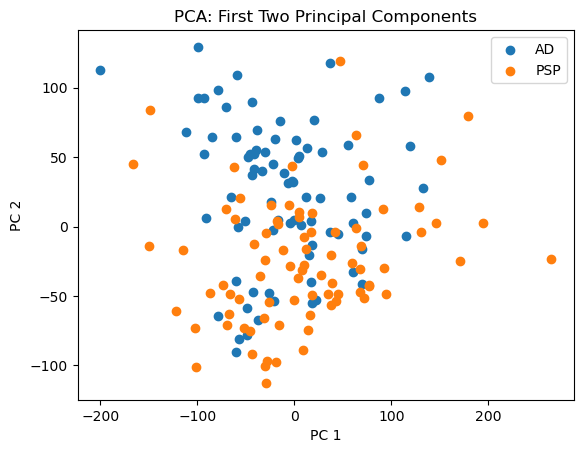

In [13]:
# Scatter plot of first two principal components 

import matplotlib.pyplot as plt 

# plt.scatter(X_projected[2],X_projected[3]) 
plt.scatter(X_projected[y == 0, 0], X_projected[y == 0, 1], label='AD')
plt.scatter(X_projected[y == 1, 0], X_projected[y == 1, 1], label='PSP')
plt.title('PCA: First Two Principal Components') 
plt.xlabel('PC 1') 
plt.ylabel('PC 2') 
plt.legend()
plt.legend() 
plt.show()

### Section 4: SVM classifier  - [20 points]
 

- Complete the 'evaluate_classifier' function to implement a SVM classifier. Use GridSearchCV to search for the optimal kernel and parameter C (C determines the margin width).
- Use 10-fold StratifiedKFold for cross-validation (CV) when searching. Set scoring to 'accuracy'. StratifiedKFold will divide our dataset into 10 sets, model will be trained on 9 sets and tested on 1 set. This results in 10 models, each fitted on different combinations of sets. 
- Print the best parameters and score found for each of X_rand, X_var, and X_projected after cross validation.

NOTE: We will not be doing a train-val-test split of the dataset in this assignment because of the small sample size. We will do a cross-validated train-test split for evaluations.


--------------------------


In [14]:
from sklearn import svm
from sklearn.model_selection import StratifiedKFold, GridSearchCV


def evaluate_classifier(clf, X, y, scoring, parameters, n_splits=10):
    # Create StratifiedKFold validation
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True)
    # Grid search for the two parameters (kernel, regularization parameter (inverse of margin))
    grid_search = GridSearchCV(clf, parameters, cv=cv, scoring='accuracy')
    grid_search.fit(X, y)
    # Print the best parameters and score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"the best parameters: {best_params}")
    print(f"the best score: {best_score}")
    return grid_search     



parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.01, 0.1, 1, 10]}
scoring = 'accuracy'

# Intiate a SVM classifier
clf = svm.SVC()


evaluate_classifier(clf, X_rand, y, scoring, parameters)
evaluate_classifier(clf, X_var, y, scoring, parameters)
evaluate_classifier(clf, X_projected, y, scoring, parameters)

# Is X_projected performing better than the other two?

the best parameters: {'C': 0.1, 'kernel': 'linear'}
the best score: 0.7595588235294117
the best parameters: {'C': 10, 'kernel': 'rbf'}
the best score: 0.7955882352941177
the best parameters: {'C': 1, 'kernel': 'sigmoid'}
the best score: 0.8143382352941178


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

### Comments:
Yes X_projected is performing better than the other two, because PCA selects the most important features which reduces any redundancies in the data, which helps SVM Classifier perform better than the other two

### Section 5: Logistic regression - [30 points]

We explored three basic methods for feature selection. Another approach for having fewer features is regularization. In lasso regularization, as we increase the parameter (it is called 'alpha' in sklearn), more and more coefficients of our features are shrinked to zero.

- Build logistic regression models using lasso regularization (L1 penalty) with varying alpha values.  
- We'll perform cross-validation using 'cross_validate' function to measure the performance of models. We will again use StratifiedKFold with 10 splits, but remember to get the splits on the original dataframe 'X'. 
    - Set scoring to 'accuracy'.
    - Record the mean test accuracy across CV splits for each alpha.
    - Record the mean number of non-zero coefficients across CV splits for each alpha.
- Repeat the above process but use ridge regression (l2 penalty) in logistic regression.
- Plot the number of non-zero feature coefficients recorded in both lasso and ridge regression versus alpha.  
- Plot cv accuracy recorded for both penalties versus alpha. Write two lines explaining why accuracy decreases as we increase alpha in lasso regression?

--------------------------


In [15]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

alphas = np.array([0.1, 1, 10, 100, 1000])
# alphas = np.array([0.1])
lasso_cv_acc = []
lasso_non_zero_coeff = []
ridge_non_zero_coeff = []
ridge_cv_acc = []

# Create StratifiedKFold validation of 10 splits on 'X'
cv = StratifiedKFold(n_splits=10, shuffle=True)

for a in alphas:
    # Instantiate a logistic regression object. Use 'saga' solver and 'l1' penalty. 
    clf = LogisticRegression(penalty='l1', solver="saga", C=(1/a))
    # Read on how parameter'C' and 'alpha' are related in logistic regression
    # Perform cross validation as described above.
    cv_result = cross_validate(clf,X,y,scoring=['accuracy'],cv=cv,return_estimator=True)
    # Record mean of test_score of all 10 models.
    acc = np.mean(np.array(cv_result['test_accuracy']))
    lasso_cv_acc.append(acc)
    # Record mean of number of non zero coeefeicitens of all 10 models
    non_zero=0
    
    for est in cv_result['estimator']:
        n = np.sum(est.coef_ != 0)
        non_zero += n
    non_zero/=10
    lasso_non_zero_coeff.append(non_zero)


for a in alphas:
    # Instantiate a logistic regression object. Use 'saga' solver and 'l1' penalty. 
    clf = LogisticRegression(penalty='l2', solver="saga", C=(1/a))
    # Read on how parameter'C' and 'alpha' are related in logistic regression
    # Perform cross validation as described above.
    cv_result = cross_validate(clf,X,y,scoring=['accuracy'],cv=cv,return_estimator=True)
    # Record mean of test_score of all 10 models.
    acc = np.mean(np.array(cv_result['test_accuracy']))
    ridge_cv_acc.append(acc)
    # Record mean of number of non zero coeefeicitens of all 10 models
    non_zero=0
    
    for est in cv_result['estimator']:
        n = np.sum(est.coef_ != 0)
        non_zero += n
    non_zero/=10
    ridge_non_zero_coeff.append(non_zero)
    




/Users/sharanraj/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sharanraj/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sharanraj/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sharanraj/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sharanraj/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sharanraj/anaconda3/lib/python3.11/sit

/Users/sharanraj/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sharanraj/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sharanraj/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sharanraj/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sharanraj/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sharanraj/anaconda3/lib/python3.11/sit

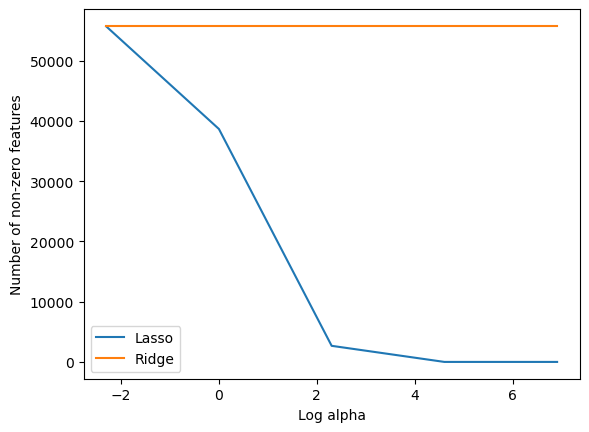

In [16]:
# Plot log of alpha vs number of non zero features. 

import matplotlib.pyplot as plt


plt.xlabel('Log alpha')
plt.ylabel('Number of non-zero features')
plt.plot(np.log(alphas), lasso_non_zero_coeff, label='Lasso')
plt.plot(np.log(alphas), ridge_non_zero_coeff, label='Ridge')
plt.legend(loc="lower left")
plt.show()


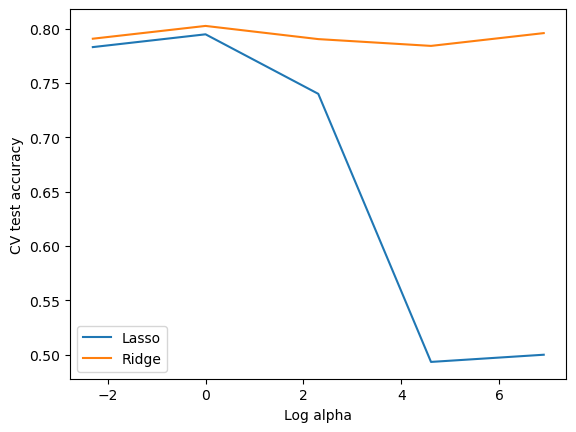

In [17]:
# Plot log of alpha vs mean CV test accuracy. 

plt.xlabel('Log alpha')
plt.ylabel('CV test accuracy')
plt.plot(np.log(alphas), lasso_cv_acc, label='Lasso')
plt.plot(np.log(alphas), ridge_cv_acc, label='Ridge')
plt.legend(loc="lower left")
plt.show()

# Write two lines below on why accuracy is decreasing in lasso?

### Comments:

Lasso generally gives sparse solution, what we mean by that is that it makes Coefficients of certain features zero but in Ridge the coefficients are close to zero but not exactly zero. Since in Lasso most coefficients are zero it is not able to represent the data properly beacuse many features don't contribute to the model, hence ridge regression does a good job as compared to lasso in predicting the data 

### Section 6: Random forest  - [25 points]
 
In this section, we will implement a random forest algorithm on X_projected (i.e., the data reduced using PCA). We will vary the number of trees and features considered when splitting nodes. 

-  Build random forest models with varying tree counts and features to consider when looking for the split.
-  Perform similar cross-validate with stratified folds, as in Section 5..
-  Record accuracies obtained for the test set for each hyperparameter combination.
-  Plot test accuracy vs tree count for each #features (m, m//2, sqrt(m)) we are using.
-  Repeat the above using just the first 25 components of X_projected.
--------------------------


In [21]:
from sklearn.ensemble import RandomForestClassifier

X_rf = X_projected

num_trees = [1, 50, 100, 200, 300, 500, 1000]
# m =  X_rf.shape[1] 
m=25
max_features = [ m, m//2, 'sqrt']
test_accs = []

# Create StratifiedKFold validation
cv = StratifiedKFold(n_splits=10, shuffle=True)

for features in max_features:
    temp=[]
    for tree in num_trees:
        # Instantiate a random forest object. Set max_depth=5. 
        clf = RandomForestClassifier(n_estimators=tree, max_depth=5,max_features=features)
        # Perform cross validation
        cv_result = cross_validate(clf,X_rf,y,scoring=['accuracy'],cv=cv,return_estimator=True)
        # Record the mean of CV test scores 
        acc = np.mean(np.array(cv_result['test_accuracy']))
        temp.append(acc)
    test_accs.append(temp)
        

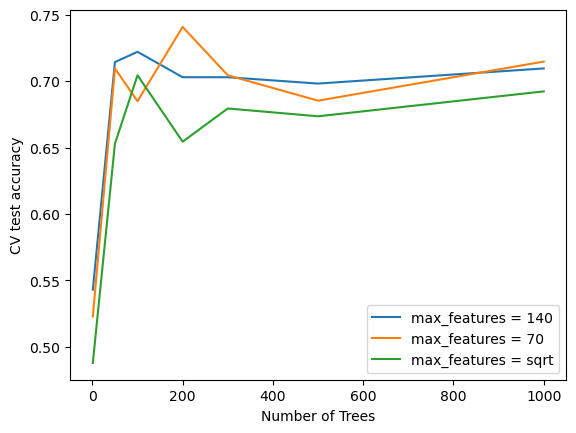

In [19]:
# Plot CV test accuracy vs number of trees 

plt.xlabel('Number of Trees')
plt.ylabel('CV test accuracy')
for i, max_feat in enumerate(max_features):
    plt.plot(num_trees, test_accs[i] , label="max_features = "+str(max_feat))
plt.legend(loc="lower right")

plt.show()


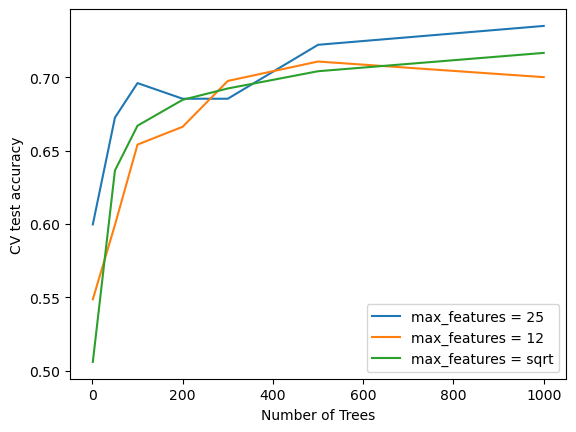

In [22]:
# Plot CV test accuracy vs number of trees 

plt.xlabel('Number of Trees')
plt.ylabel('CV test accuracy')
for i, max_feat in enumerate(max_features):
    plt.plot(num_trees, test_accs[i] , label="max_features = "+str(max_feat))
plt.legend(loc="lower right")

plt.show()

#### Section 6.1: What are your observations in the plot above?


##### m = 140:

For m=140 we can see to get a decent accuracy it requires atleast a 100-150 trees. The highest cross-validation test accuracy is most often attained by max_features = 70 and max_features = 140

##### m = 25:

For m=25 for aa decent accuracy it takes atleast 200 trees and the highest cross-validation test accuracy is most often attained by max_features = 25


The test dataset varies with different k-fold splits, leading to variations in accuracy levels for all three scenarios shown in the plots for each excecution

## Using Deep learning

In [21]:
import torch
import torch.nn as nn
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [32]:
# Model Definition
class Classification(nn.Module):
    def __init__(self, in_channels):
        super(Classification, self).__init__()

        self.classifier = nn.Sequential(
        nn.Linear(in_channels, in_channels*2),
        nn.LeakyReLU(0.1),
        nn.Linear(in_channels*2, in_channels*4),
        nn.LeakyReLU(0.1),
        nn.Linear(in_channels*4, in_channels*6),
        nn.LeakyReLU(0.2),
        nn.Linear(in_channels*6, in_channels*4),
        nn.LeakyReLU(0.1),
        nn.Linear(in_channels*4, in_channels*2),
        nn.LeakyReLU(0.1),
        nn.Linear(in_channels*2, in_channels),
        nn.LeakyReLU(0.1),
        nn.Linear(in_channels, 1),
        nn.Sigmoid()
        )

    def forward(self,x):
        return self.classifier(x)

In [33]:
X_proj = torch.tensor(X_projected,dtype=torch.float32)
y_tens = torch.tensor(y,dtype=torch.float32).reshape((y.shape[0],1))

In [34]:
from sklearn.model_selection import train_test_split

x_train, X_temp, y_train, y_temp = train_test_split(X_proj, y_tens, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [35]:
y_val.shape

torch.Size([17, 1])

In [36]:
step_size = 1e-4
Model = Classification(in_channels=X_projected.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(Model.parameters(), lr=step_size)

In [37]:
loss_curve = []
accuracy_curve = []

num_epochs= 200
for epoch in range(num_epochs):
    Model.train()
    y_pred = Model(x_train)
    loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # validation
    Model.eval()
    with torch.no_grad():
      y_pred_valid = Model(x_val)
      loss_val = criterion(y_pred_valid, y_val)
      pred_val = (y_pred_valid > 0.5).float()
      acc_val= accuracy_score(y_val.numpy(), pred_val.numpy())

    loss_curve.append(loss.item())
    accuracy_curve.append(acc_val)
    if (epoch + 1) % 10 == 0:
      print(f'Epoch {epoch+1}: Validation Accuracy: {(acc_val*100):.4f}%')

Epoch 10: Validation Accuracy: 64.7059%
Epoch 20: Validation Accuracy: 88.2353%
Epoch 30: Validation Accuracy: 88.2353%
Epoch 40: Validation Accuracy: 88.2353%
Epoch 50: Validation Accuracy: 88.2353%
Epoch 60: Validation Accuracy: 88.2353%
Epoch 70: Validation Accuracy: 88.2353%
Epoch 80: Validation Accuracy: 88.2353%
Epoch 90: Validation Accuracy: 88.2353%
Epoch 100: Validation Accuracy: 88.2353%
Epoch 110: Validation Accuracy: 88.2353%
Epoch 120: Validation Accuracy: 88.2353%
Epoch 130: Validation Accuracy: 88.2353%
Epoch 140: Validation Accuracy: 88.2353%
Epoch 150: Validation Accuracy: 88.2353%
Epoch 160: Validation Accuracy: 88.2353%
Epoch 170: Validation Accuracy: 88.2353%
Epoch 180: Validation Accuracy: 88.2353%
Epoch 190: Validation Accuracy: 88.2353%
Epoch 200: Validation Accuracy: 88.2353%


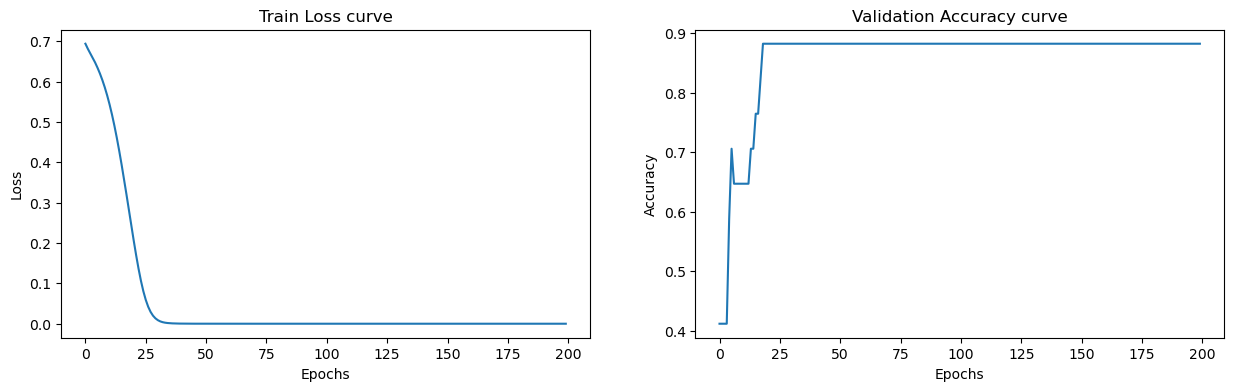

In [38]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(loss_curve)
plt.title("Train Loss curve")
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracy_curve)
plt.title("Validation Accuracy curve")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [22]:
Model.eval()
with torch.no_grad():
  pred = Model(x_test)
  test_preds = (pred > 0.5).float()
  accuracy = accuracy_score(y_test.numpy(), test_preds.numpy())*100

print(f'\n Test Accuracy of the Classification Model {Model} is : {accuracy:.2f}%')


 Test Accuracy of the Classification Model Classification(
  (classifier): Sequential(
    (0): Linear(in_features=140, out_features=280, bias=True)
    (1): ReLU()
    (2): Linear(in_features=280, out_features=560, bias=True)
    (3): ReLU()
    (4): Linear(in_features=560, out_features=280, bias=True)
    (5): ReLU()
    (6): Linear(in_features=280, out_features=140, bias=True)
    (7): ReLU()
    (8): Linear(in_features=140, out_features=1, bias=True)
    (9): Sigmoid()
  )
) is : 87.50%


In [31]:
Model.eval()
with torch.no_grad():
  pred = Model(x_test)
  test_preds = (pred > 0.5).float()
  accuracy = accuracy_score(y_test.numpy(), test_preds.numpy())*100

print(f'\n Test Accuracy of the Classification Model {Model} is : {accuracy:.2f}%')


 Test Accuracy of the Classification Model Classification(
  (classifier): Sequential(
    (0): Linear(in_features=140, out_features=280, bias=True)
    (1): LeakyReLU(negative_slope=0.1)
    (2): Linear(in_features=280, out_features=560, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=560, out_features=280, bias=True)
    (5): LeakyReLU(negative_slope=0.1)
    (6): Linear(in_features=280, out_features=140, bias=True)
    (7): LeakyReLU(negative_slope=0.1)
    (8): Linear(in_features=140, out_features=1, bias=True)
    (9): Sigmoid()
  )
) is : 93.75%


for the given data leaky ReLU activation has a better performnce than ReLU, it might be beacuse of the effect of the Negative values in the Genomics data was overwritten in ReLU

In [39]:
Model.eval()
with torch.no_grad():
  pred = Model(x_test)
  test_preds = (pred > 0.5).float()
  accuracy = accuracy_score(y_test.numpy(), test_preds.numpy())*100

print(f'\n Test Accuracy of the Classification Model {Model} is : {accuracy:.2f}%')


 Test Accuracy of the Classification Model Classification(
  (classifier): Sequential(
    (0): Linear(in_features=140, out_features=280, bias=True)
    (1): LeakyReLU(negative_slope=0.1)
    (2): Linear(in_features=280, out_features=560, bias=True)
    (3): LeakyReLU(negative_slope=0.1)
    (4): Linear(in_features=560, out_features=840, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=840, out_features=560, bias=True)
    (7): LeakyReLU(negative_slope=0.1)
    (8): Linear(in_features=560, out_features=280, bias=True)
    (9): LeakyReLU(negative_slope=0.1)
    (10): Linear(in_features=280, out_features=140, bias=True)
    (11): LeakyReLU(negative_slope=0.1)
    (12): Linear(in_features=140, out_features=1, bias=True)
    (13): Sigmoid()
  )
) is : 81.25%


Deeper model performs worse than a shallow network this might be due to the less data availabilty